# Khushi Meena
## Exploratory data Analysis - Sports
### Problem Statement : Find out the most successful teams, players and factors contributing win or loss of a team.
#### Importing Necessary Libraries

In [343]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

> ### Best performing teams

In [344]:
Matches = pd.read_csv('matches.csv') 
Matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [345]:
Matches.shape

(756, 18)

In [346]:
Matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#### Matches Won

In [347]:
Matches.groupby('season')['winner'].value_counts()

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

#### PlayOffs 

In [348]:
Matches.groupby('season')['winner'].value_counts().groupby(level = 0).head(4)

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
2009    Delhi Daredevils               10
        Deccan Chargers                 9
        Royal Challengers Bangalore     9
        Chennai Super Kings             8
2010    Mumbai Indians                 11
        Chennai Super Kings             9
        Deccan Chargers                 8
        Royal Challengers Bangalore     8
2011    Chennai Super Kings            11
        Mumbai Indians                 10
        Royal Challengers Bangalore    10
        Kolkata Knight Riders           8
2012    Kolkata Knight Riders          12
        Delhi Daredevils               11
        Chennai Super Kings            10
        Mumbai Indians                 10
2013    Mumbai Indians                 13
        Chennai Super Kings            12
        Rajasthan Royals               1

#### PlayOff Counts 

In [349]:
Wins = pd.DataFrame(Matches.groupby('season')['winner'].value_counts().groupby(level = 0).head(4))
PlayOffs = Wins.index
PlayOffs = [i[1] for i in PlayOffs]
PlayOffs = pd.DataFrame(PlayOffs)
PlayOffs[0].value_counts()

Chennai Super Kings            10
Mumbai Indians                  8
Kolkata Knight Riders           7
Royal Challengers Bangalore     5
Sunrisers Hyderabad             4
Delhi Daredevils                3
Rajasthan Royals                3
Kings XI Punjab                 3
Deccan Chargers                 2
Delhi Capitals                  1
Gujarat Lions                   1
Rising Pune Supergiant          1
Name: 0, dtype: int64

#### Season Winners

In [350]:
Matches.groupby('season')['winner'].value_counts().groupby(level = 0).head(1)

season  winner               
2008    Rajasthan Royals         13
2009    Delhi Daredevils         10
2010    Mumbai Indians           11
2011    Chennai Super Kings      11
2012    Kolkata Knight Riders    12
2013    Mumbai Indians           13
2014    Kings XI Punjab          12
2015    Chennai Super Kings      10
2016    Sunrisers Hyderabad      11
2017    Mumbai Indians           12
2018    Chennai Super Kings      11
2019    Mumbai Indians           11
Name: winner, dtype: int64

> ### Best Performing Players
  #### 1. Batsmans

In [351]:
Deliveries = pd.read_csv('deliveries.csv') 
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [352]:
Deliveries.shape

(179078, 21)

In [353]:
Deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

####  Total Runs Scored

In [354]:
def Scored_Runs(Deliveries):
    runs = pd.DataFrame()
    runs['Total Scored Runs'] = Deliveries.groupby('batsman').sum()['batsman_runs'].sort_values(ascending= False)
    return runs

In [355]:
Scored_Runs(Deliveries).head(10)

,Total Scored Runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632
CH Gayle,4560
MS Dhoni,4477
RV Uthappa,4446
AB de Villiers,4428


Text(0.5, 1.0, 'Total Scored Runs in IPL History')

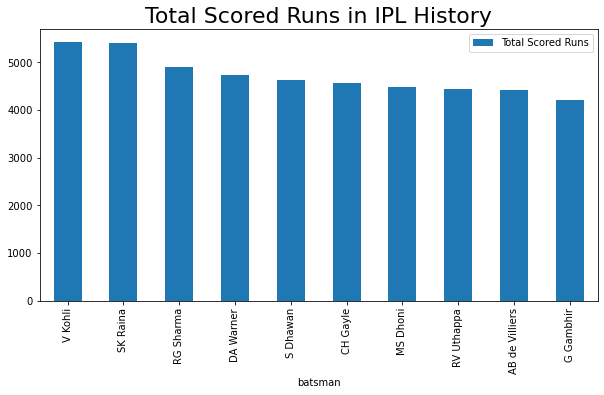

In [426]:
Scored_Runs(Deliveries).head(10).plot(kind = 'bar', figsize = (10,5))
plt.title('Total Scored Runs in IPL History', fontsize = 22)

#### Runs Scored in a Match

In [357]:
MatchRuns=pd.DataFrame(Deliveries.groupby(['match_id', 'batsman']).sum()['batsman_runs'].sort_values(ascending=False))
MatchRuns.head(10)

,,batsman_runs
match_id,batsman,
411,CH Gayle,175
60,BB McCullum,158
562,AB de Villiers,133
7935,RR Pant,130
620,AB de Villiers,129
372,CH Gayle,128
206,M Vijay,127
36,DA Warner,126
516,V Sehwag,122


Text(0.5, 1.0, 'Highest Runs Scored in a Match')

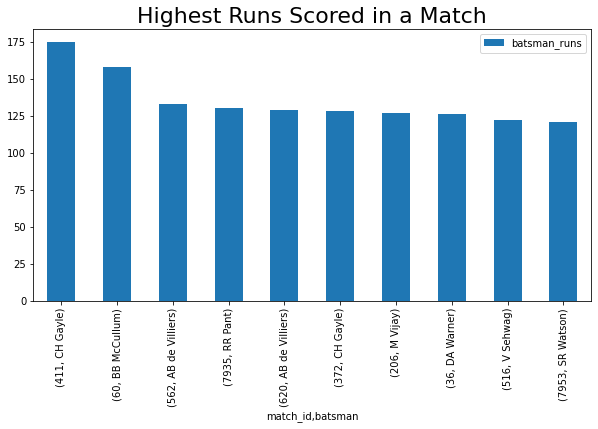

In [417]:
MatchRuns.head(10).plot(kind = 'bar', figsize = (10,5))
plt.title('Highest Runs Scored in a Match', fontsize = 22)

#### Strike Rates

In [359]:
# Strike rate is the runs scored per 100 balls faced.
def Strike_Rate(Deliveries):
    Player = pd.DataFrame()
    Player['Total runs Scored'] = Deliveries.groupby('batsman').sum()['batsman_runs']
    Player['Total Balls Faced'] = Deliveries['batsman'].value_counts()
    Player['Strike Rate'] = Player.apply(lambda x:0 if x[1] < 150 else (x[0]/x[1])*100, axis = 1)
    Strike = pd.DataFrame(Player['Strike Rate'].sort_values(ascending = False))
    return Strike

In [360]:
Strike_Rate(Deliveries).head(10)

,Strike Rate
batsman,
AD Russell,179.950187
M Ali,169.945355
SP Narine,166.943867
RR Pant,162.318841
J Bairstow,159.726962
GJ Maxwell,155.543237
CH Morris,153.392330
HH Pandya,151.902174
JC Buttler,150.000000


Text(0.5, 1.0, 'Strike Rates of Diferent Batsmans')

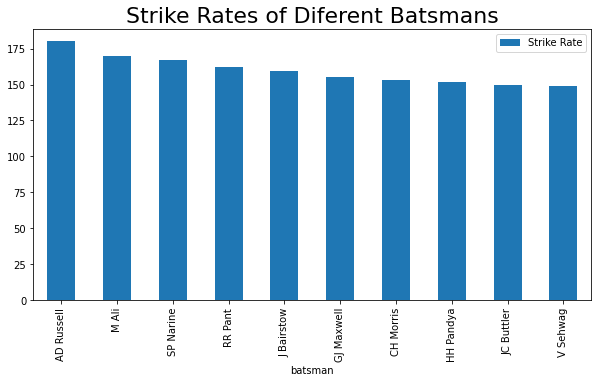

In [421]:
Strike_Rate(Deliveries).head(10).plot(kind = 'bar', figsize = (10,5))
plt.title('Strike Rates of Diferent Batsmans', fontsize = 22)

#### Batting Averages

In [362]:
def Batting_avg(Deliveries):
    runs = pd.DataFrame()
    runs['Total Scored Runs'] = Deliveries.groupby('batsman').sum()['batsman_runs']
    dismissal = pd.DataFrame()
    dismissal['Total dismissal'] = Deliveries['player_dismissed'].value_counts()
    
    Batting_average = pd.DataFrame((runs['Total Scored Runs']/dismissal['Total dismissal']).sort_values(ascending = False))
    return Batting_average
    

In [363]:
Batting_avg(Deliveries).head(10)

,0
J Bairstow,58.500000
MN van Wyk,55.666667
AC Voges,45.250000
HM Amla,44.384615
Iqbal Abdulla,44.000000
DA Warner,43.100000
KL Rahul,42.829787
MS Dhoni,42.638095
CH Gayle,41.834862
PD Collingwood,40.600000


Text(0.5, 1.0, 'Batting Averages of Different Batsmans')

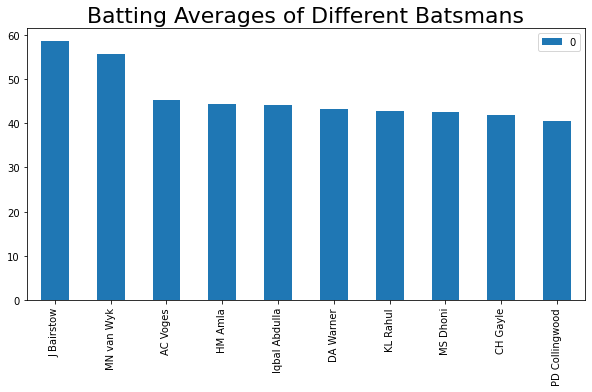

In [422]:
Batting_avg(Deliveries).head(10).plot(kind = 'bar', figsize = (10,5))
plt.title('Batting Averages of Different Batsmans',fontsize = 22)

#### 2. Bowlers

#### Wickets Taken

In [365]:
def Wicket_count(Deliveies):
    dismissal = pd.DataFrame()
    dismissal = Deliveries[pd.isnull(Deliveries['player_dismissed'])!=True]
    bowl_dismissal = dismissal[dismissal['dismissal_kind']!='run out']
    Wickets_Taken = pd.DataFrame(bowl_dismissal.bowler.value_counts())
    return Wickets_Taken

In [366]:
Wicket_count(Deliveries).head(10)

,bowler
SL Malinga,170
A Mishra,156
Harbhajan Singh,150
PP Chawla,149
DJ Bravo,147
B Kumar,133
R Ashwin,125
SP Narine,122
UT Yadav,119
RA Jadeja,108


Text(0.5, 1.0, 'Highest Wickets Count')

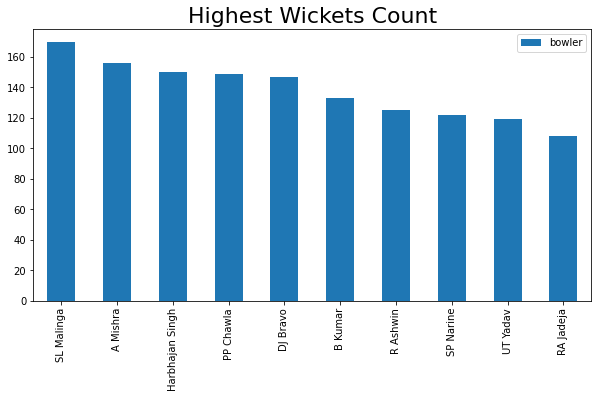

In [423]:
Wicket_count(Deliveries).head(10).plot(kind = 'bar', figsize = (10,5))
plt.title('Highest Wickets Count', fontsize = 22)

#### Bowling Average

In [368]:
def Bowling_avg(Deliveries):
    runs = pd.DataFrame(Deliveries.groupby('bowler').sum()['total_runs'])
    runs = runs[runs.total_runs>300]
    wickets = pd.DataFrame()
    wickets = Wicket_count(Deliveries)
    runs = runs.join(wickets)
    runs.columns = ['Runs_Concieved','wickets']
    runs = runs.dropna(axis = 0, subset = ['wickets'])
    
    runs['Bowl_Avg'] = runs.Runs_Concieved/runs.wickets
    bowl_avg = pd.DataFrame(runs['Bowl_Avg'].sort_values(ascending = True))
    return bowl_avg

In [406]:
Bowling_avg(Deliveries).head(10)

,Bowl_Avg
bowler,
K Ahmed,17.550000
CRD Fernando,18.000000
BJ Hodge,18.235294
DE Bollinger,18.842105
AD Mascarenhas,19.210526
K Rabada,19.322581
MF Maharoof,19.703704
S Gopal,19.815789
R Rampaul,19.937500


Text(0.5, 1.0, 'Bowling Averages of Different Bowlers')

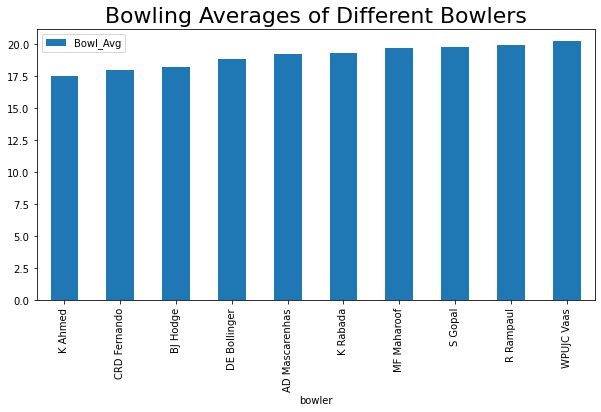

In [425]:
Bowling_avg(Deliveries).head(10).plot(kind = 'bar',figsize = (10,5))
plt.title('Bowling Averages of Different Bowlers', fontsize = 22 )

> ### Recent Deliveries(2018-2019)

In [370]:
Recent_Deliveries = Deliveries[Deliveries['match_id']>=7894]
Recent_Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150460,7894,1,Mumbai Indians,Chennai Super Kings,1,1,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150461,7894,1,Mumbai Indians,Chennai Super Kings,1,2,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150462,7894,1,Mumbai Indians,Chennai Super Kings,1,3,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
150463,7894,1,Mumbai Indians,Chennai Super Kings,1,4,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
150464,7894,1,Mumbai Indians,Chennai Super Kings,1,5,RG Sharma,E Lewis,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


#### Batsman

In [371]:
def Top_Batsmans(input1, input2, input3):
    input1 = list(input1.index)
    input1 = dict(zip(input1, range(1, len(input1) + 1)))
    input2 = list(input2.index)
    input2 = dict(zip(input2, range(1, len(input2) + 1)))
    input3 = list(input3)
    input3 = dict(zip(input3, range(1, len(input3) + 1)))
    
    CT1 = pd.DataFrame(input1, index = ['Rank']).T
    CT1 = pd.concat([CT1, pd.DataFrame(input2, index = ['Rank']).T, pd.DataFrame(input3, index = ['Rank']).T])
    CT1['Score'] = 11- CT1['Rank']
    Player = pd.DataFrame((CT1.groupby(CT1.index).sum()['Score']/3).sort_values(ascending = False))
    return Player.head(3)

In [372]:
Top_Batsmans(input1 = Batting_avg(Recent_Deliveries), input2 = Strike_Rate(Recent_Deliveries), input3 = Scored_Runs(Recent_Deliveries))


,Score
J Bairstow,4.000000
RR Pant,3.333333
AB de Villiers,3.333333


#### Bowler

In [373]:
def Top_Bowlers(input1, input2):
    input1 = list(input1.index)
    input1 = dict(zip(input1, range(1, len(input1) + 1)))
    input2 = list(input2.index)
    input2 = dict(zip(input2, range(1, len(input2) + 1)))
    
    CT1 = pd.DataFrame(input1, index = ['Rank']).T
    CT1 = pd.concat([CT1, pd.DataFrame(input2, index = ['Rank']).T])
    CT1['Score'] = 11- CT1['Rank']
    Player = pd.DataFrame((CT1.groupby(CT1.index).sum()['Score']/2).sort_values(ascending = False))
    return Player.head(3)

In [374]:
Top_Bowlers(input1 = Wicket_count(Recent_Deliveries), input2 = Bowling_avg(Recent_Deliveries))


,Score
SL Malinga,10.0
A Mishra,9.0
Harbhajan Singh,8.0


####  All Rounders

In [375]:
def Top_AllRounders(input1, input2, input3):
    input1 = list(input1.index)
    input1 = dict(zip(input1, range(1, len(input1) + 1)))
    input2 = list(input2.index)
    input2 = dict(zip(input2, range(1, len(input2) + 1)))
    input3 = list(input3)
    input3 = dict(zip(input3, range(1, len(input3) + 1)))
    
    CT1 = pd.DataFrame(input1, index = ['Rank']).T
    CT1 = pd.concat([CT1, pd.DataFrame(input2, index = ['Rank']).T, pd.DataFrame(input3, index = ['Rank']).T])
    CT1['Score'] = 11- CT1['Rank']
    Player = pd.DataFrame((CT1.groupby(CT1.index).sum()['Score']/3).sort_values(ascending = False))
    return Player.head(3)

In [376]:
Top_AllRounders(input2 = Batting_avg(Recent_Deliveries), input1 = Strike_Rate(Recent_Deliveries), input3 = Bowling_avg(Recent_Deliveries))


,Score
J Bairstow,4.000000
Bowl_Avg,3.333333
AB de Villiers,3.333333


> ### Factors Affecting

#### 1. Winning or Loosing Toss

In [382]:
# Winning Match by winning Toss
MatchWon_TossWon = (Matches.toss_winner == Matches.winner)
Matches_Won = pd.DataFrame(MatchWon_TossWon.value_counts())
Matches_Won.index = ['Toss Won_Match Won', 'Toss Lost_Match Won']
Matches_Won.columns = ['Total Matches Won']
Matches_Won = Matches_Won.T
Matches_Won

,Toss Won_Match Won,Toss Lost_Match Won
Total Matches Won,393,363


(array([0]), [Text(0, 0, 'Total Matches Won')])

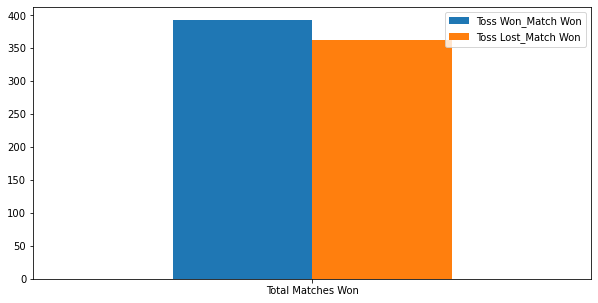

In [412]:
Matches_Won.plot(kind = 'bar', figsize = (10,5))
plt.xticks(rotation = 0)

#### Batting or Bowling First

In [392]:
Matches[['winner', 'toss_decision', 'team1', 'team2']]

,winner,toss_decision,team1,team2
0,Sunrisers Hyderabad,field,Sunrisers Hyderabad,Royal Challengers Bangalore
1,Rising Pune Supergiant,field,Mumbai Indians,Rising Pune Supergiant
2,Kolkata Knight Riders,field,Gujarat Lions,Kolkata Knight Riders
3,Kings XI Punjab,field,Rising Pune Supergiant,Kings XI Punjab
4,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,Delhi Daredevils
...,...,...,...,...
751,Mumbai Indians,field,Kolkata Knight Riders,Mumbai Indians
752,Mumbai Indians,bat,Chennai Super Kings,Mumbai Indians
753,Delhi Capitals,field,Sunrisers Hyderabad,Delhi Capitals
754,Chennai Super Kings,field,Delhi Capitals,Chennai Super Kings


In [398]:
Decision = Matches['winner'] == Matches['team2']
Result = pd.DataFrame(Decision.value_counts())
Result.index = ['Batting First and Winning', 'Bowling First and Winning']
Result.columns = ['Total Matches Won']
Result = Result.T
Result

,Batting First and Winning,Bowling First and Winning
Total Matches Won,417,339


(array([0]), [Text(0, 0, 'Total Matches Won')])

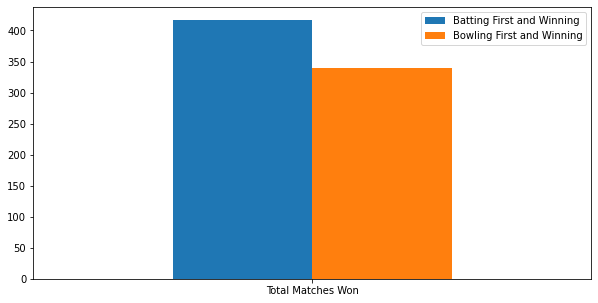

In [411]:
Result.plot(kind = 'bar', figsize = (10,5))
plt.xticks(rotation=0)

## Observations and Conclusions

In [ ]:
1. The best performing teams in IPL season has been seen
2. Best Batsmans are decided by three factors:
                                             1.The Batting Average
                                             2.The Strike Rate
                                             3.Total Highest Scored Runs
3. Best Bowlers are decided by two factors:
                                          1.The Total Wickets Taken
                                          2.The Bowling Average
4. Top three Batsman in recent Years : J Bairstow, RR Pant, AB de Villiers
5. Top three Bowlers in recent Years : SL Malinga, A Mishra, Harbhajan Singh
6. Top three AllRounders in recent Years : J Bairstow, Bowl_Avg, AB de Villiers